# PCA

## Task 1:  EDA

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### Read the data

In [3]:
df1 = pd.read_csv("./wine.csv") 

In [4]:
df1.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


### Check for duplicates

In [7]:
df1[df1.duplicated(keep=False)]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


In [8]:
df1.nunique()

Type                 3
Alcohol            126
Malic              133
Ash                 79
Alcalinity          63
Magnesium           53
Phenols             97
Flavanoids         132
Nonflavanoids       39
Proanthocyanins    101
Color              132
Hue                 78
Dilution           122
Proline            121
dtype: int64

In [9]:
import ydata_profiling as pp

In [11]:
report = pp.ProfileReport(df1)

In [12]:
report.to_file(output_file='eda_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 13954.43it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### The features are highly correlated : from the report

### Correlation analysis

In [214]:
corr_matrix = df1.corr().abs()
corr_matrix

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,0.328222,0.437776,0.049643,0.517859,0.209179,0.719163,0.847498,0.489109,0.499130,0.265668,0.617369,0.788230,0.633717
Alcohol,0.328222,1.000000,0.094397,0.211545,0.310235,0.270798,0.289101,0.236815,0.155929,0.136698,0.546364,0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,0.054575,0.335167,0.411007,0.292977,0.220746,0.248985,0.561296,0.368710,0.192011
Ash,0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,0.074667,0.003911,0.223626
Alcalinity,0.517859,0.310235,0.288500,0.443367,1.000000,0.083333,0.321113,0.351370,0.361922,0.197327,0.018732,0.273955,0.276769,0.440597
Magnesium,0.209179,0.270798,0.054575,0.286587,0.083333,1.000000,0.214401,0.195784,0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,0.719163,0.289101,0.335167,0.128980,0.321113,0.214401,1.000000,0.864564,0.449935,0.612413,0.055136,0.433681,0.699949,0.498115
Flavanoids,0.847498,0.236815,0.411007,0.115077,0.351370,0.195784,0.864564,1.000000,0.537900,0.652692,0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,0.155929,0.292977,0.186230,0.361922,0.256294,0.449935,0.537900,1.000000,0.365845,0.139057,0.262640,0.503270,0.311385
Proanthocyanins,0.499130,0.136698,0.220746,0.009652,0.197327,0.236441,0.612413,0.652692,0.365845,1.000000,0.025250,0.295544,0.519067,0.330417


### Plotting correlation heatmap

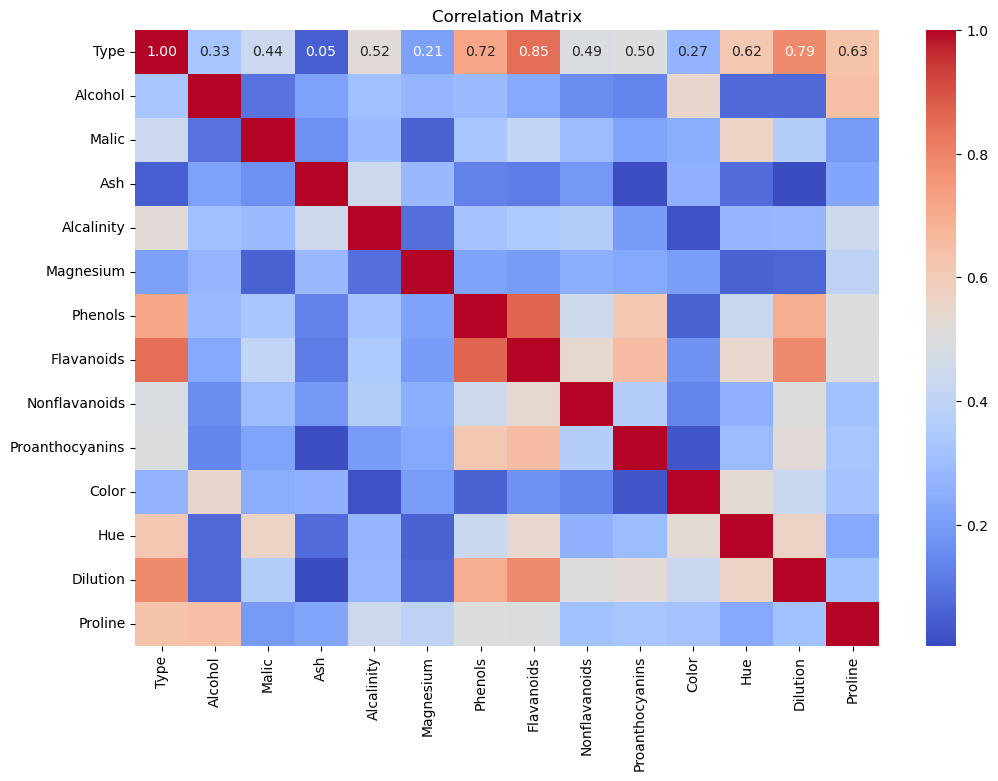

In [225]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [226]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

In [227]:
# Find features with correlation > 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
print("Columns to drop due to high correlation:", to_drop)

Columns to drop due to high correlation: ['Flavanoids']


In [229]:
# Drop the highly correlated columns
df_reduced = df1.drop(columns=to_drop)

In [230]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(10), int64(3)
memory usage: 18.2 KB


## Scale the data

In [231]:
scaler = StandardScaler()

In [232]:
scaled_data = scaler.fit_transform(df_reduced)

## Visualisation

## Histogram plot

In [233]:
%matplotlib inline

In [234]:
scaled_df = pd.DataFrame(scaled_data, columns=df_reduced.columns)

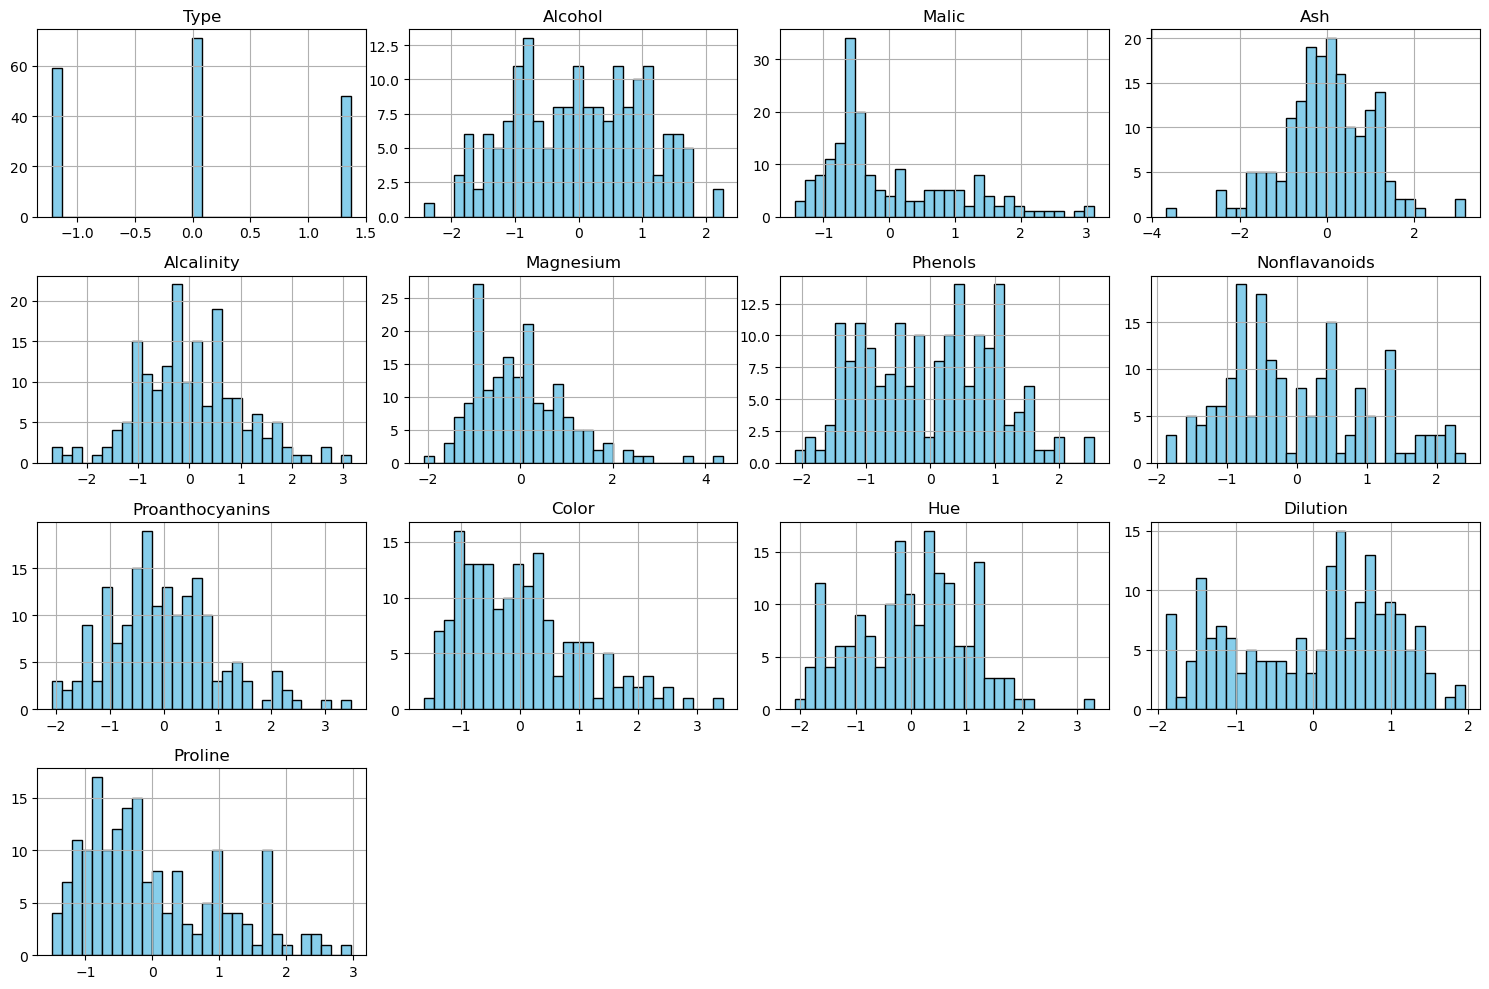

In [235]:
scaled_df.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

## Boxplot for outlier detection

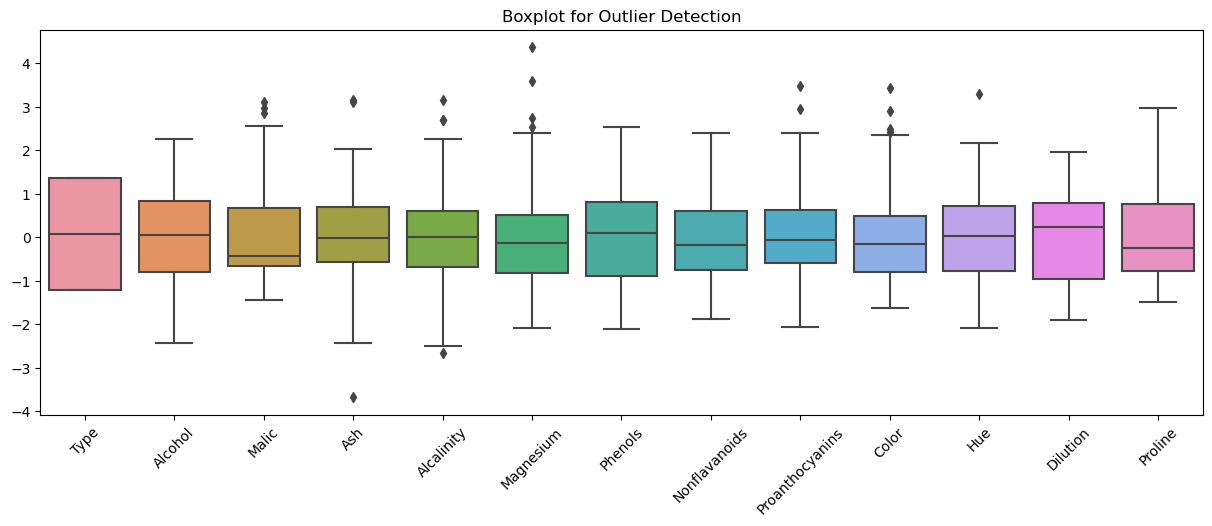

In [236]:
plt.figure(figsize=(15,5))
sns.boxplot(data=scaled_df)
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [20]:
from scipy.stats import iqr

In [238]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(10), int64(3)
memory usage: 18.2 KB


### Function to detect and remove outliers

In [57]:
def remove_outliers_iqr(data2, cols):
    mask = pd.Series(True, index=data2.index)
    for col in cols:
        Q1 = data2[col].quantile(0.25)
        Q3 = data2[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        mask &= data2[col].between(lower, upper)
    return data2[mask]

In [239]:
cleaned_data = remove_outliers_iqr(scaled_df, scaled_df.columns)
print("Removed:", len(scaled_df) - len(cleaned_data), "rows")

Removed: 17 rows


In [240]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             161 non-null    float64
 1   Alcohol          161 non-null    float64
 2   Malic            161 non-null    float64
 3   Ash              161 non-null    float64
 4   Alcalinity       161 non-null    float64
 5   Magnesium        161 non-null    float64
 6   Phenols          161 non-null    float64
 7   Nonflavanoids    161 non-null    float64
 8   Proanthocyanins  161 non-null    float64
 9   Color            161 non-null    float64
 10  Hue              161 non-null    float64
 11  Dilution         161 non-null    float64
 12  Proline          161 non-null    float64
dtypes: float64(13)
memory usage: 17.6 KB


## Task 2: Dimensionality Reduction with PCA

In [63]:
from sklearn.decomposition import PCA

#### Find n_components

In [243]:
model = PCA()

In [244]:
reduced_data = model.fit_transform(cleaned_data)
reduced_data

array([[ 3.40676555, -1.21103688,  0.16850902, ...,  0.11500244,
         0.49403454, -0.52013676],
       [ 2.40321834,  0.32285461, -1.66265539, ...,  0.41167965,
         0.28182503, -0.09654358],
       [ 2.52238859, -0.72841388,  1.02081697, ...,  0.21292832,
         0.01337244,  0.05685727],
       ...,
       [-2.55234584, -3.10361162, -0.75604742, ..., -0.79984379,
         0.61007485, -0.03444069],
       [-2.30568942, -2.56029899, -0.44841674, ..., -0.40095825,
         0.32660432, -0.31044566],
       [-3.05246346, -2.87318171,  1.00436971, ...,  0.23226107,
        -0.01029894,  0.19012127]])

In [245]:
exp_var = model.explained_variance_ratio_
exp_var

array([0.40675266, 0.19904449, 0.08420943, 0.06783211, 0.05610601,
       0.04276511, 0.03352643, 0.02599778, 0.02529874, 0.02092955,
       0.01689747, 0.01312653, 0.00751368])

In [125]:
cum_var = np.cumsum(exp_var)
cum_var

array([0.39542486, 0.57378745, 0.67707846, 0.74335831, 0.80603706,
       0.85409266, 0.89364973, 0.91865217, 0.93969088, 0.95842703,
       0.97455906, 0.98661596, 0.99587055, 1.        ])

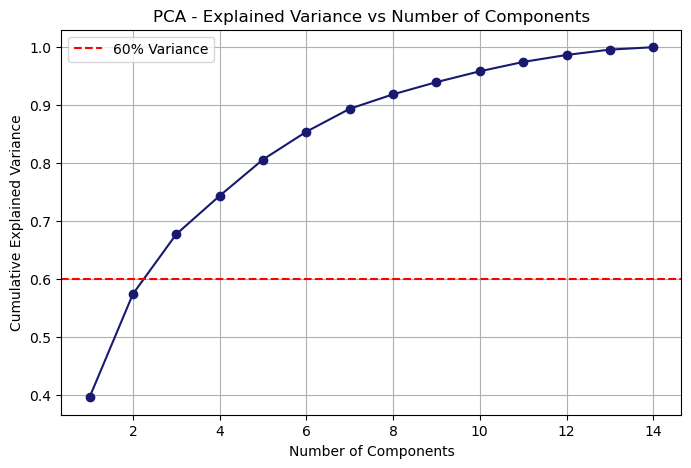

In [284]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o', color='midnightblue')
plt.axhline(y=0.60, color='r', linestyle='--', label='60% Variance')  ## choosing 60% variance to improve model performance
plt.title('PCA - Explained Variance vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

In [285]:
model_pca = PCA(n_components=2)

In [286]:
reduced_data = model_pca.fit_transform(cleaned_data)
reduced_data

array([[ 3.40676555e+00, -1.21103688e+00],
       [ 2.40321834e+00,  3.22854609e-01],
       [ 2.52238859e+00, -7.28413879e-01],
       [ 3.81300120e+00, -2.42097903e+00],
       [ 1.20523013e+00, -6.72366198e-01],
       [ 3.12760137e+00, -1.95084423e+00],
       [ 2.86928411e+00, -9.88351858e-01],
       [ 2.45318408e+00, -1.48239281e+00],
       [ 2.70950917e+00, -8.13156304e-01],
       [ 2.83506220e+00, -5.60817501e-01],
       [ 3.50429212e+00, -1.07677552e+00],
       [ 2.16217355e+00, -5.38136251e-01],
       [ 2.39674980e+00, -5.32402063e-01],
       [ 3.39317193e+00, -9.22406536e-01],
       [ 4.29883348e+00, -1.82573007e+00],
       [ 2.54729112e+00, -1.48779375e+00],
       [ 2.31822111e+00, -2.12294871e+00],
       [ 1.89521830e+00, -1.45676815e+00],
       [ 3.44193340e+00, -2.29948070e+00],
       [ 2.19204023e+00, -9.51130439e-01],
       [ 3.10405839e+00, -5.86252021e-01],
       [ 1.40118999e+00, -8.07576831e-02],
       [ 2.66036589e+00,  2.75958829e-01],
       [ 1.

## KMeans clustering

In [104]:
from sklearn.cluster import KMeans

#### Find hyperparameter k

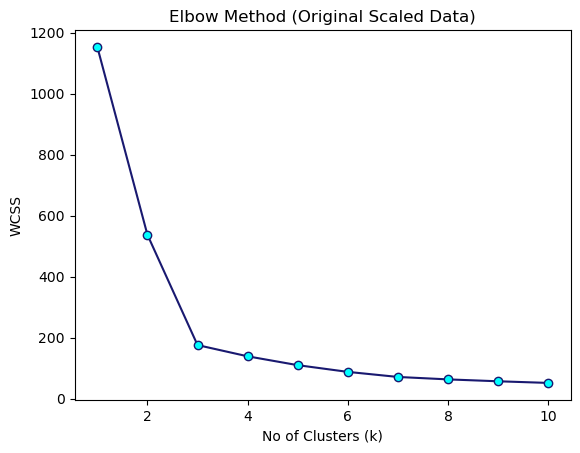

In [287]:
wcss = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(reduced_data)
    wcss.append(model.inertia_)

plt.plot(range(1, 11), wcss, marker='o', color='midnightblue', mfc='cyan')
plt.title('Elbow Method (Original Scaled Data)')
plt.xlabel('No of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [112]:
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

In [288]:
k_range = range(1, 11)
kneedle = KneeLocator(k_range, wcss, curve="convex", direction="decreasing")
print("Optimal number of clusters:", kneedle.elbow)

Optimal number of clusters: 3


## Task 4: Clustering with PCA Data

### Build the kmeans model

In [289]:
model_km = KMeans(n_clusters=3, n_init=10, random_state=0)
model_km.fit_predict(reduced_data)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [290]:
score = silhouette_score(reduced_data, model_km.labels_)
print("Silhouette Score after PCA:", score)

Silhouette Score after PCA: 0.6286398452693378


In [291]:
num_components = reduced_data.shape[1]
col_names = [f'PC{i+1}' for i in range(num_components)]

# Convert to DataFrame
df_reduced = pd.DataFrame(reduced_data, columns=col_names)
df_reduced['Cluster'] = model_km.labels_

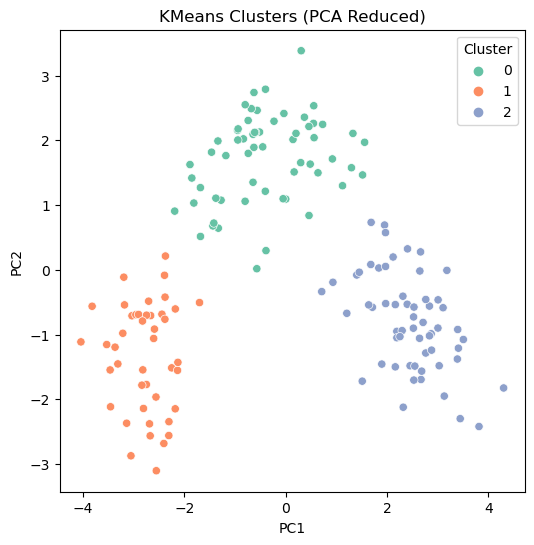

In [292]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_reduced, palette='Set2')
plt.title('KMeans Clusters (PCA Reduced)')
plt.show()

### Interpretation

##### I chose n_components = 2 since it captures 60% of variance and gives a high Silhouette Score (0.628) compared to other values i itried (95% variance and 90% variance),this shows good clustering performance in a reduced space.

## Task 3: KMeans Clustering with Original Data

In [293]:
# cleaned data from outlier detection
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             161 non-null    float64
 1   Alcohol          161 non-null    float64
 2   Malic            161 non-null    float64
 3   Ash              161 non-null    float64
 4   Alcalinity       161 non-null    float64
 5   Magnesium        161 non-null    float64
 6   Phenols          161 non-null    float64
 7   Nonflavanoids    161 non-null    float64
 8   Proanthocyanins  161 non-null    float64
 9   Color            161 non-null    float64
 10  Hue              161 non-null    float64
 11  Dilution         161 non-null    float64
 12  Proline          161 non-null    float64
dtypes: float64(13)
memory usage: 17.6 KB


### Find hyperparameter k

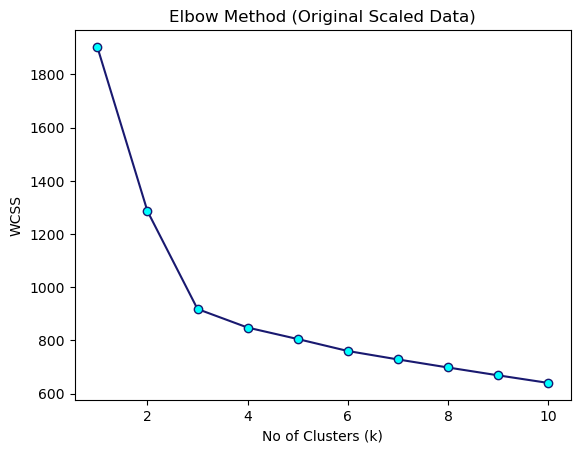

In [294]:
wcss = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(cleaned_data)
    wcss.append(model.inertia_)

plt.plot(range(1, 11), wcss, marker='o', color='midnightblue', mfc='cyan')
plt.title('Elbow Method (Original Scaled Data)')
plt.xlabel('No of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

### From the above plot k = 3

### Build the kmeans model using cleaned_data

In [301]:
model_km1 = KMeans(n_clusters=3, n_init=10, random_state=0)
model_km1.fit_predict(cleaned_data)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [303]:
score = silhouette_score(cleaned_data, model_km1.labels_)
print("Silhouette Score without PCA:", score)

Silhouette Score without PCA: 0.3274319021712705


In [304]:
fin = cleaned_data.copy()

In [306]:
fin["label"]=model_km1.labels_
fin.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,label
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,2
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,2
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,2


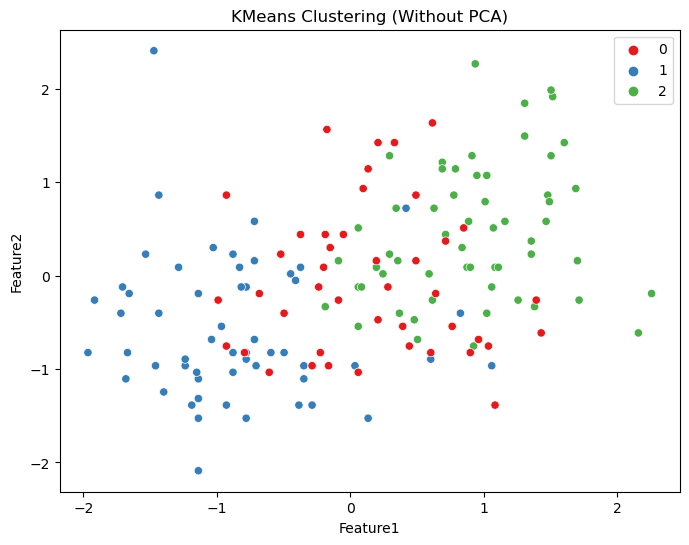

In [310]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data= fin, x='Alcohol', y='Magnesium', hue='label', palette='Set1')
plt.title("KMeans Clustering (Without PCA)")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.legend()
plt.show()

## Task 5: Comparison and Analysis:

### Comparison of Clustering Results

without PCA, kmeans: Silhouette Score without PCA: 0.327. 

with PCA, kmeans: Silhouette Score after PCA: 0.628

Clustering with PCA-transformed data yielded significantly better results.This shows improved cluster separation after dimensionality reduction.

 Tho both approaches used KMeans clustering on scaled data and identified clusters within the dataset.PCA revealed more distinct clusters, likely due to reduced multicollinearity, retaining important variance (60 percent), projecting data into fewer dimensions.
 
 Original data had more overlap and noise, which reduced silhouette score without pca.

### **Task 6: Conclusion and Insights**



 Clustering on PCA-transformed data significantly improved silhouette score.PCA helped simplify the data and remove noise, improving performance, while
clustering directly on original data struggled due to feature redundancy.

PCA improves accuracy, but reduces feature interpretability.

So PCA can be used when there are many features or strong correlation and when the goal is performance not interpretability.

Avoid PCA when feature importance or interpretability is critical.


### Recommendations

Use PCA + clustering for high-dimensional or noisy datasets.

Use original features when domain knowledge or interpretability matters.

Always balance between performance and explainability depending on the context.

